In [2]:
# uncomment the line below to enable realtime graphs
# %matplotlib ipympl

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# get a reference to all the submodels
models = model.models

# instantiate a custom interface object especially designed to interact with the neonatal model engine instance
from custom_interfaces.NeoInterface import NeoInterface

neo = NeoInterface(model)

# enable or disable the physiological submodels which can be enabled or disabled.
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(True)

# enable or disable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.artificial_whomb(False)
neo.resuscitation(True)

# stabilize the model by calculating 60 seconds
neo.calculate(60)

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 3.1 sec. Average model step in 0.0259 ms.


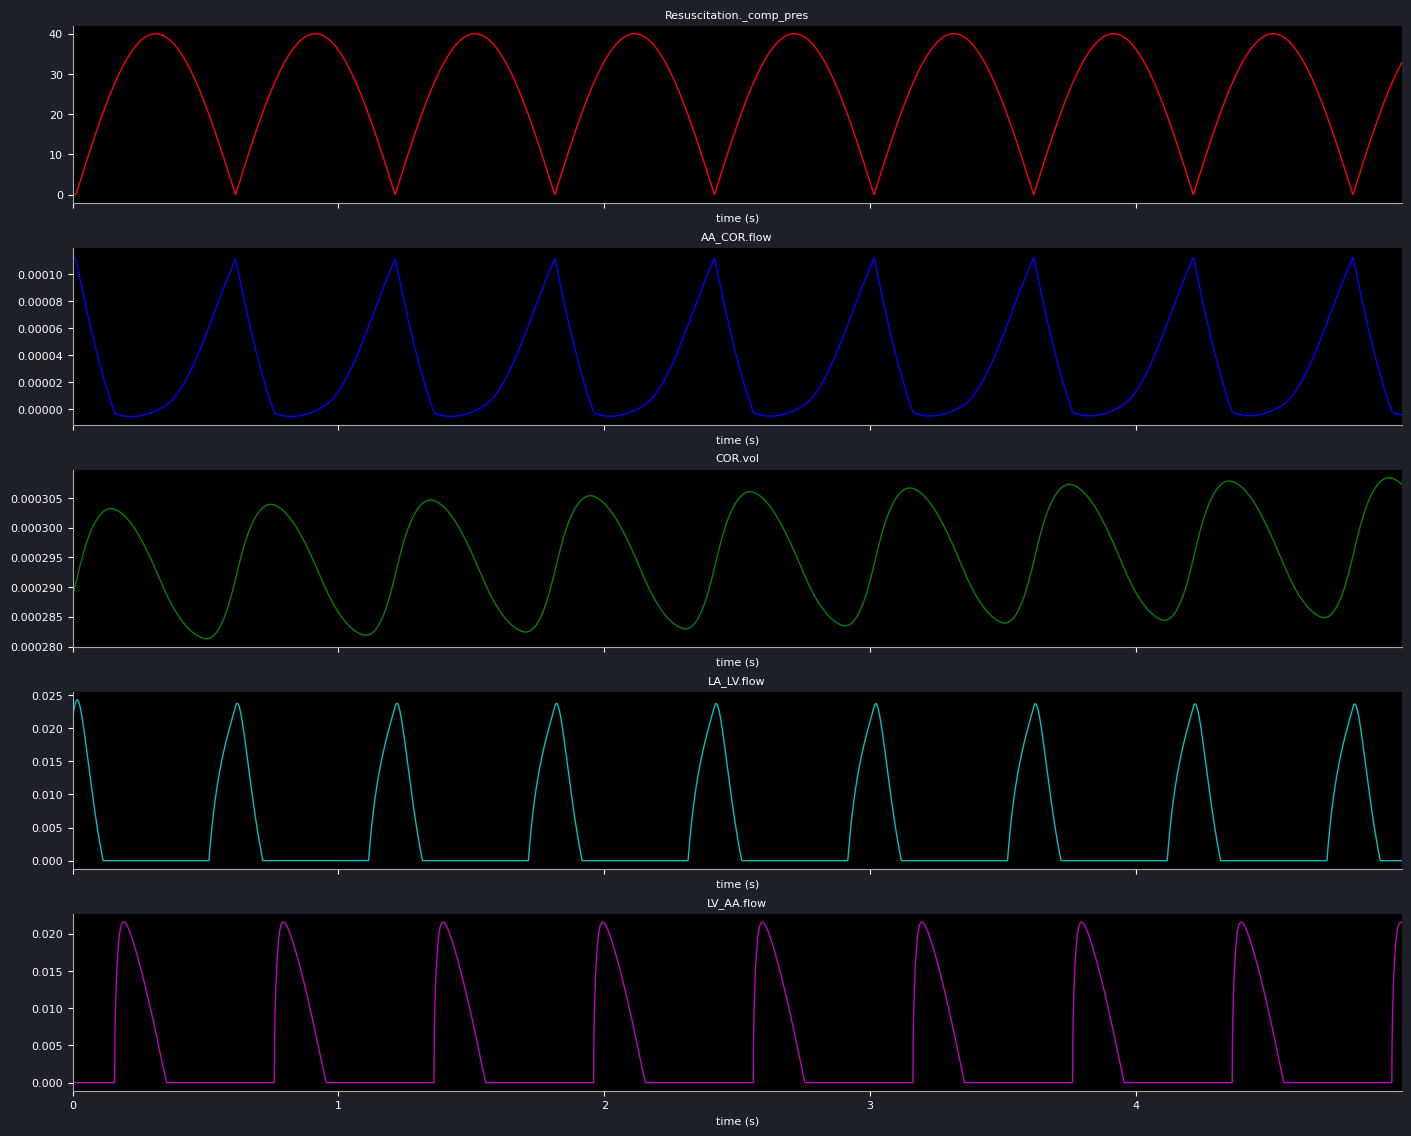

Resuscitation._comp_pres: max       40.0 min        0.0
AA_COR.flow     : net    2.00512, forward    2.06665, backward   -0.06153 ml/min, stroke volume:    0.01519 ml, 
COR.vol         : max    0.30839, min    0.28133 ml
LA_LV.flow      : net  284.53723, forward  284.53723, backward        0.0 ml/min, stroke volume:    2.15537 ml, 
LV_AA.flow      : net  255.54746, forward  255.54746, backward        0.0 ml/min, stroke volume:    1.93577 ml, 


In [6]:
models["Resuscitation"].start_cpr()
models["Resuscitation"].chest_comp_pres = 40.0
neo.plot_time_graph(
    ["Resuscitation._comp_pres", "AA_COR.flow", "COR.vol","LA_LV.flow","LV_AA.flow"],
    combined=False,
    sharey=False,
    sampleinterval=0.0005,
    fill=False,
    time_to_calculate = 5
)

In [ ]:
neo.get_bloodgas("AA")

In [ ]:
neo.fast_forward(120)